# Time Series Exercises: Explore

In [458]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=19)

from acquire import get_german_power, get_store_data
from prepare import get_power_distribution, prep_german_power, store_data_distribution, prep_store_data
import statsmodels.api as sm

## Store Items

In [428]:
# Acquire
df = get_store_data()

# prep df
df = prep_store_data(df)

In [429]:
df

store_id  item_id    item_upc14    item_upc12          item_brand  \
sale_date                                                                       
2013-01-01         1        1   35200264013   35200264013            Riceland   
2013-01-01         3       17   88313590791   88313590791               Ducal   
2013-01-01        10        7   70177154004   70177154004  Twinings Of London   
2013-01-01         3       18   21200725340   21200725340              Scotch   
2013-01-01         3       19   41520035646   41520035646             Careone   
...              ...      ...           ...           ...                 ...   
2017-12-31         7       39   28400029254   28400029254            Munchies   
2017-12-31         7       40   42272008063   42272008063                Amys   
2017-12-31         7       41   31000670016   31000670016         P.f. Changs   
2017-12-31         7       28  719175900007  719175900007        Usda Produce   
2017-12-31        10       50   47445919221   47445919221              Choice   

                                                    item_name  item_price  \
sale_date                                                                   
2013-01-01                     Riceland American Jazmine Rice        0.84   
2013-01-01                            Ducal Refried Red Beans        1.16   
2013-01-01  Twinings Of London Classics Lady Grey Tea - 20 Ct        9.64   
2013-01-01    Scotch Removable Clear Mounting Squares - 35 Ct        4.39   
2013-01-01                     Careone Family Comb Set - 8 Ct        0.74   
...                                                       ...         ...   
2017-12-31  Munchies Sandwich Crackers Cheddar Cheese On G...        9.02   
2017-12-31               Amys Light & Lean Spaghetti Italiano        0.60   
2017-12-31  P.f. Changs Home Menu Meal For Two Beef With B...        5.62   
2017-12-31                                              Guava        7.52   
2017-12-31  Choice Organic Teas Black Tea Classic Black - ...        5.20   

            sale_id  sale_amount            store_address  store_zipcode  \
sale_date                                                                  
2013-01-01        1           13   12125 Alamo Ranch Pkwy          78253   
2013-01-01   295813           26  2118 Fredericksburg Rdj          78201   
2013-01-01   125995           32     8503 NW Military Hwy          78231   
2013-01-01   314073           45  2118 Fredericksburg Rdj          78201   
2013-01-01   332333           34  2118 Fredericksburg Rdj          78201   
...             ...          ...                      ...            ...   
2017-12-31   706662           31   12018 Perrin Beitel Rd          78217   
2017-12-31   724922           22   12018 Perrin Beitel Rd          78217   
2017-12-31   743182           19   12018 Perrin Beitel Rd          78217   
2017-12-31   505802           59   12018 Perrin Beitel Rd          78217   
2017-12-31   913000           82     8503 NW Military Hwy          78231   

             store_city store_state  month  day_of_week  sales_total  
sale_date                                                             
2013-01-01  San Antonio          TX      1            1        10.92  
2013-01-01  San Antonio          TX      1            1        30.16  
2013-01-01  San Antonio          TX      1            1       308.48  
2013-01-01  San Antonio          TX      1            1       197.55  
2013-01-01  San Antonio          TX      1            1        25.16  
...                 ...         ...    ...          ...          ...  
2017-12-31  San Antonio          TX     12            6       279.62  
2017-12-31  San Antonio          TX     12            6        13.20  
2017-12-31  San Antonio          TX     12            6       106.78  
2017-12-31  San Antonio          TX     12            6       443.68  
2017-12-31  San Antonio          TX     12            6       426.40  

[913000 rows x 16 columns]

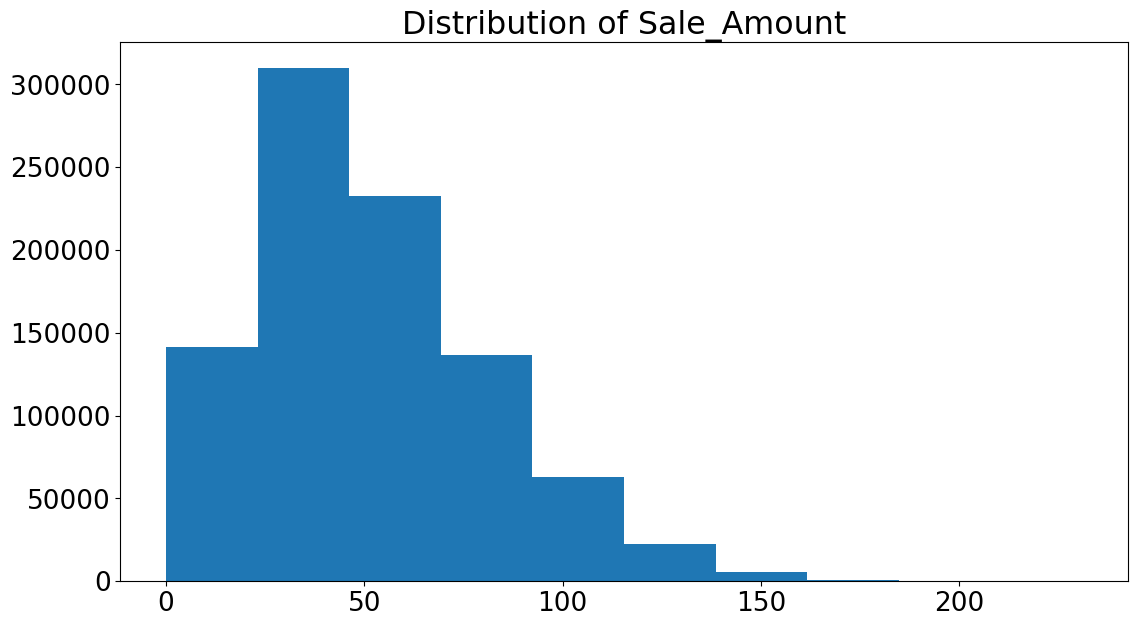

In [430]:
store_data_distribution(df)

### Split

In [431]:
# splitting by proportion:
train_index = round(df.shape[0] * .7)
train_proportion = df[:train_index]
test_proportion = df[train_index:]


# human-interpreted seasonal split:
train = df.loc[:'2016']
test = df.loc['2017']

In [432]:
test.shape

(182500, 16)

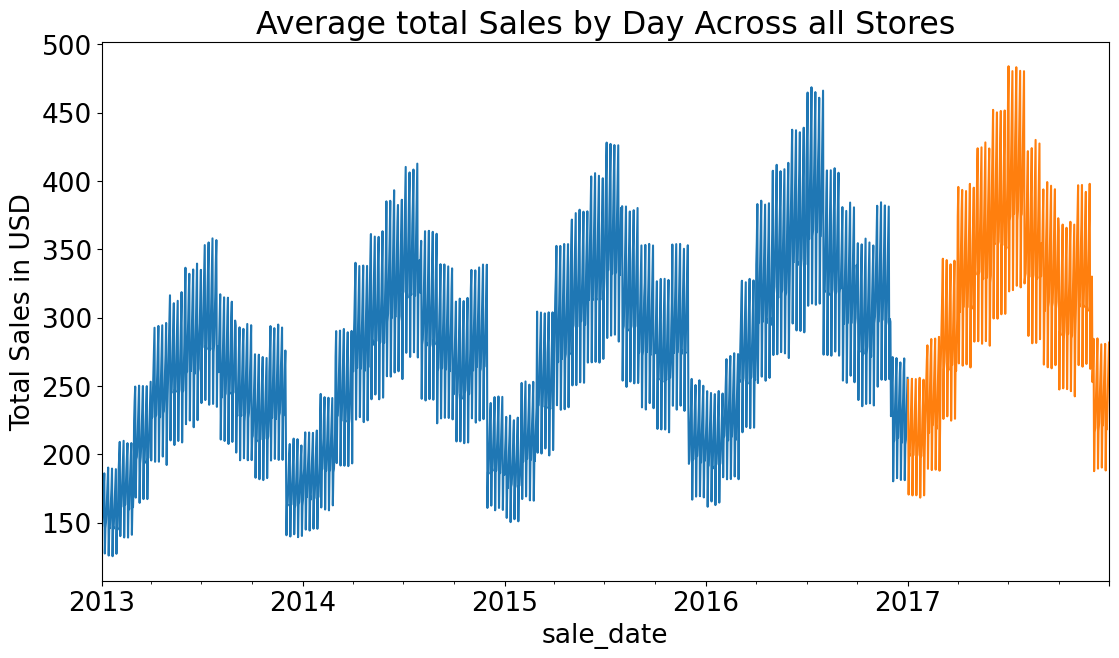

In [433]:
train.resample('D').sales_total.mean().plot()
test.resample('D').sales_total.mean().plot()
plt.title('Average total Sales by Day Across all Stores')

plt.ylabel('Total Sales in USD')
plt.show()

In [434]:
y = train['sales_total']

### Mean Sales by Month

In [435]:
ax = y.groupby(y.index.month).mean().plot.bar(width=0.9, ec='black')
ax.set_title('Average Sales_Total by Month')
plt.xticks(rotation=45)
plt.show()

### Mean Sales by Day of Week

In [436]:
ax = y.groupby(
    y.index.day_of_week).mean().plot.bar(width=0.9, ec='black')

ax.set_title('Average Sales_Total by Day of Week')
# ax.set(xlabels=y.index.day_name().unique().to_list())
plt.show()

### Vizualize Resamples

In [437]:
y.resample('1D').mean().plot(label='Daily', alpha=0.3)
y.resample('1W').mean().plot(label='Weekly', alpha=0.6)
y.resample('1M').mean().plot(label='Monthly', alpha=0.8)

plt.legend()
plt.title('Seasonal Trends by Resamples')
plt.show()

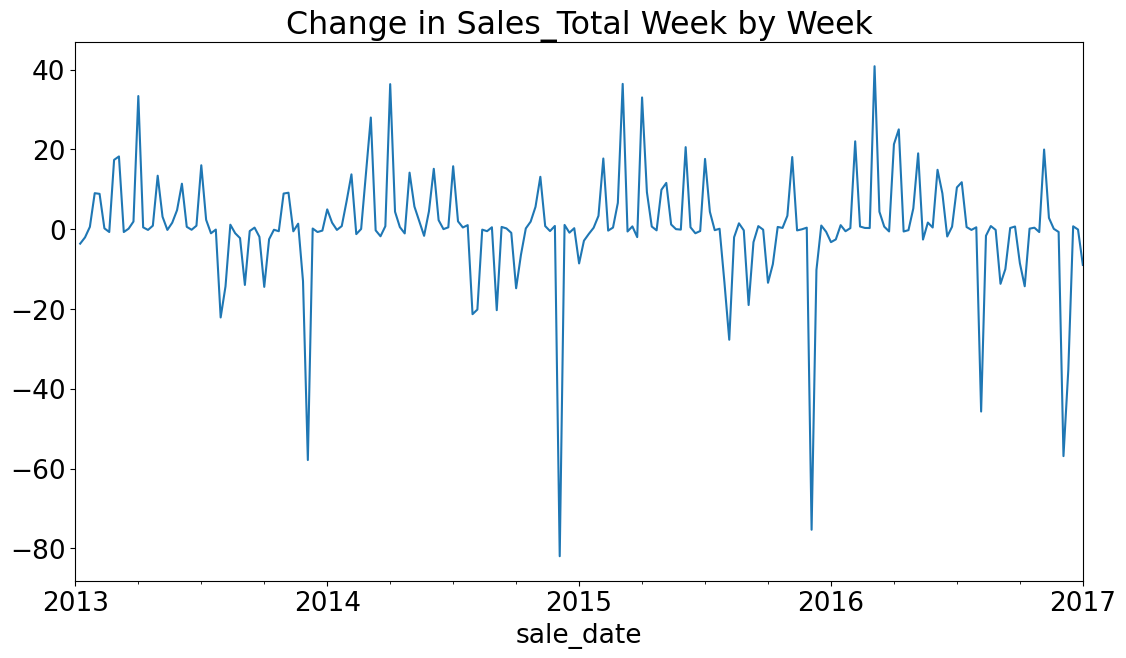

In [438]:
y.resample('W').mean().diff().plot()
plt.title('Change in Sales_Total Week by Week')
plt.show()

In [439]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot()
plt.title('Average sales total by Month For Each Year')
plt.show()

### Lag Plot

In [440]:
train.head()

store_id  item_id   item_upc14   item_upc12          item_brand  \
sale_date                                                                     
2013-01-01         1        1  35200264013  35200264013            Riceland   
2013-01-01         3       17  88313590791  88313590791               Ducal   
2013-01-01        10        7  70177154004  70177154004  Twinings Of London   
2013-01-01         3       18  21200725340  21200725340              Scotch   
2013-01-01         3       19  41520035646  41520035646             Careone   

                                                    item_name  item_price  \
sale_date                                                                   
2013-01-01                     Riceland American Jazmine Rice        0.84   
2013-01-01                            Ducal Refried Red Beans        1.16   
2013-01-01  Twinings Of London Classics Lady Grey Tea - 20 Ct        9.64   
2013-01-01    Scotch Removable Clear Mounting Squares - 35 Ct        4.39   
2013-01-01                     Careone Family Comb Set - 8 Ct        0.74   

            sale_id  sale_amount            store_address  store_zipcode  \
sale_date                                                                  
2013-01-01        1           13   12125 Alamo Ranch Pkwy          78253   
2013-01-01   295813           26  2118 Fredericksburg Rdj          78201   
2013-01-01   125995           32     8503 NW Military Hwy          78231   
2013-01-01   314073           45  2118 Fredericksburg Rdj          78201   
2013-01-01   332333           34  2118 Fredericksburg Rdj          78201   

             store_city store_state  month  day_of_week  sales_total  
sale_date                                                             
2013-01-01  San Antonio          TX      1            1        10.92  
2013-01-01  San Antonio          TX      1            1        30.16  
2013-01-01  San Antonio          TX      1            1       308.48  
2013-01-01  San Antonio          TX      1            1       197.55  
2013-01-01  San Antonio          TX      1            1        25.16

In [441]:
train_day = train[['month','day_of_week','sales_total']].resample('D').mean()
train_week = train[['month','day_of_week','sales_total']].resample('W').mean()
train_month = train[['month','day_of_week','sales_total']].resample('M').mean()


In [442]:
train_day.loc[:,'y(t+1)'] = train_day.sales_total.shift(-1).values
train_week.loc[:,'y(t+1)'] = train_week.sales_total.shift(-1).values
train_month.loc[:,'y(t+1)'] = train_month.sales_total.shift(-1).values

In [443]:
plt.scatter(train_day.sales_total, train_day['y(t+1)'])
plt.title('Sales Now vs Sales Tomorrow')
plt.show()

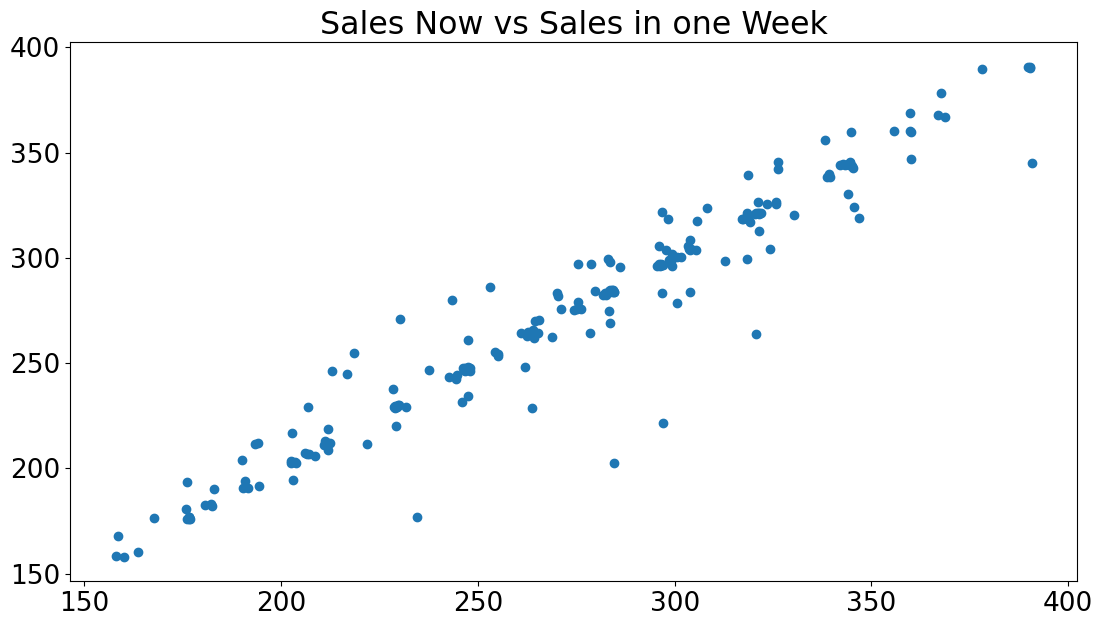

In [444]:
plt.scatter(train_week.sales_total, train_week['y(t+1)'])
plt.title('Sales Now vs Sales in one Week')
plt.show()

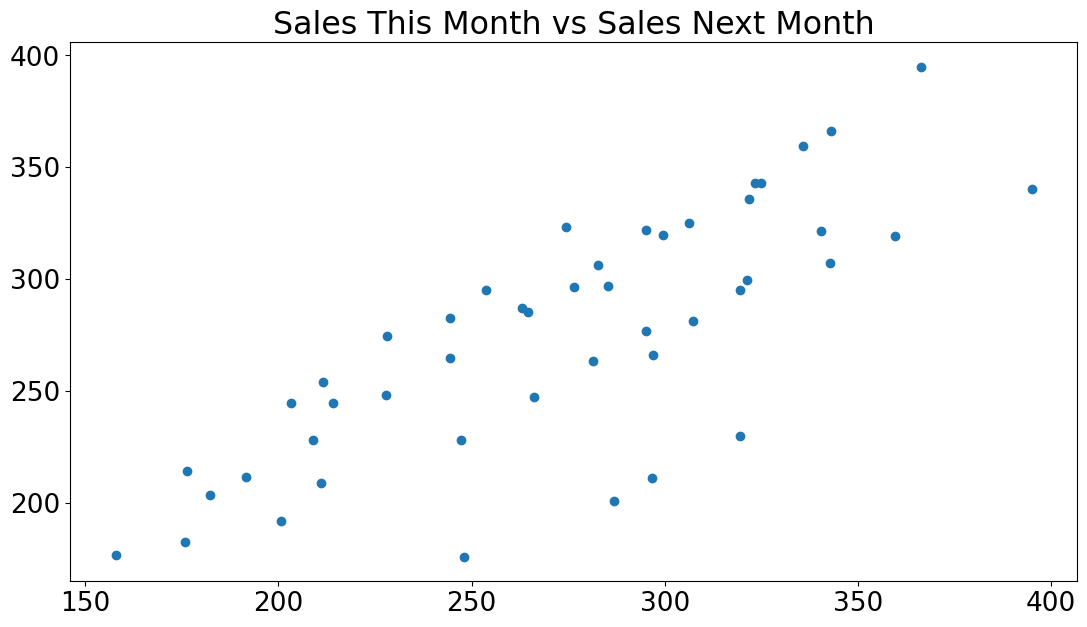

In [445]:
plt.scatter(train_month.sales_total, train_month['y(t+1)'])
plt.title('Sales This Month vs Sales Next Month')
plt.show()

month  day_of_week   this_week  half_a_year_later
sale_date                                                        
2013-01-06   1.000000          3.5  163.589167         299.209394
2013-01-13   1.000000          3.0  159.981203         301.578849
2013-01-20   1.000000          3.0  157.946720         300.565134
2013-01-27   1.000000          3.0  158.545383         300.484531
2013-02-03   1.428571          3.0  167.585014         278.376257
...               ...          ...         ...                ...
2016-12-04  11.571429          3.0  263.768997                NaN
2016-12-11  12.000000          3.0  228.559894                NaN
2016-12-18  12.000000          3.0  229.298643                NaN
2016-12-25  12.000000          3.0  229.231000                NaN
2017-01-01  12.000000          2.5  220.279177                NaN

[209 rows x 4 columns]

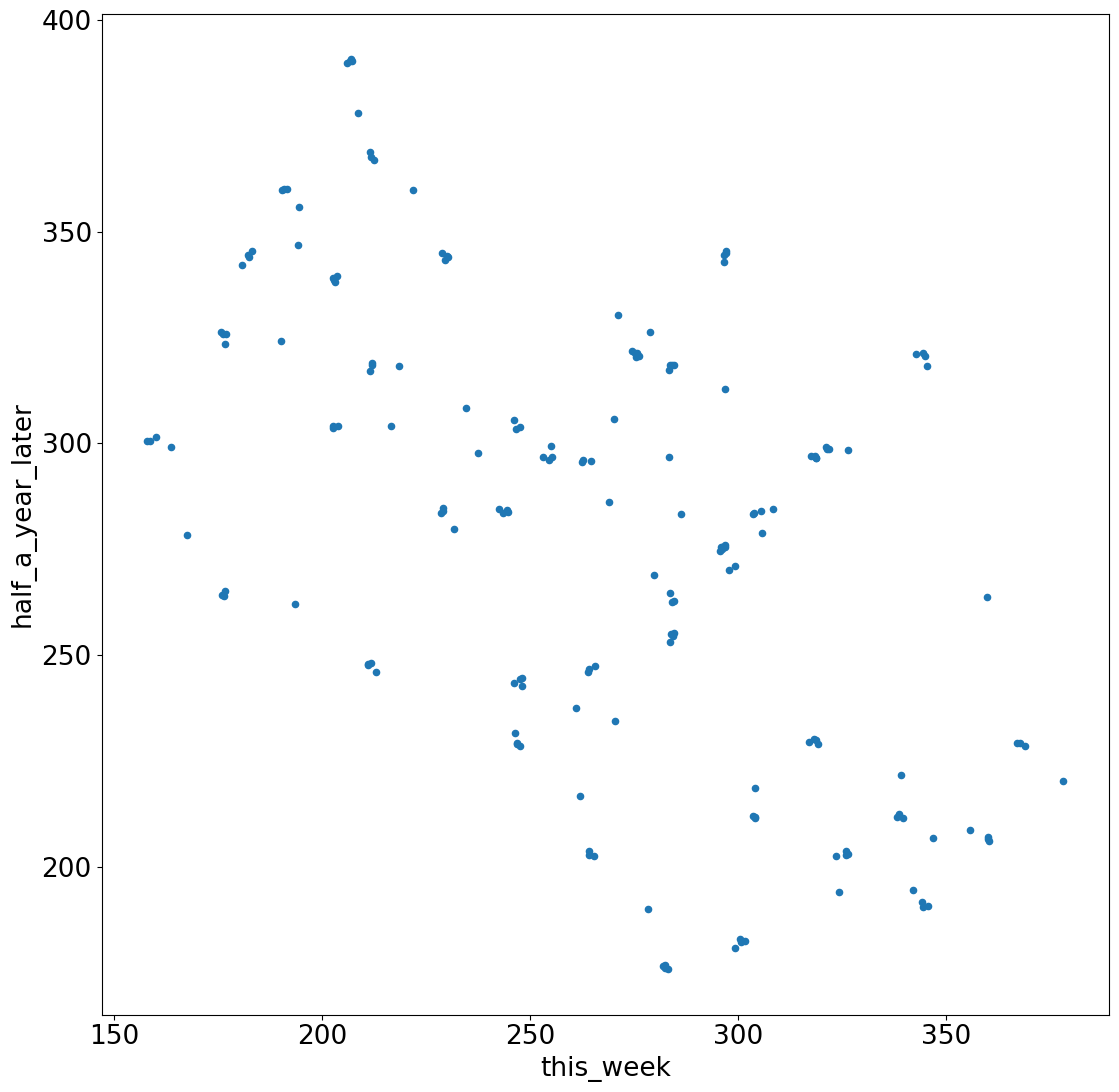

In [446]:
weekly = train[['month','day_of_week','sales_total']].resample('W').mean()
weekly['half_a_year_later'] = weekly.sales_total.shift(-26)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='half_a_year_later', figsize=(13, 13))
weekly

month  day_of_week  this_month  half_a_year_later
sale_date                                                    
2013-01-31    1.0     2.903226  157.894723         296.881241
2013-02-28    2.0     3.000000  176.411855         266.183375
2013-03-31    3.0     3.193548  214.181650         247.237694
2013-04-30    4.0     2.833333  244.460082         227.868064
2013-05-31    5.0     3.000000  264.663123         248.108656
2013-06-30    6.0     3.166667  285.261279         175.753692
2013-07-31    7.0     2.806452  296.881241         182.410791
2013-08-31    8.0     3.096774  266.183375         203.207122
2013-09-30    9.0     3.000000  247.237694         244.488991
2013-10-31   10.0     2.903226  227.868064         282.786091
2013-11-30   11.0     3.100000  248.108656         306.267538
2013-12-31   12.0     2.935484  175.753692         324.965376
2014-01-31    1.0     3.000000  182.410791         342.849100
2014-02-28    2.0     3.000000  203.207122         307.345466
2014-03-31    3.0     3.064516  244.488991         281.350430
2014-04-30    4.0     2.900000  282.786091         263.133772
2014-05-31    5.0     3.096774  306.267538         286.821036
2014-06-30    6.0     3.000000  324.965376         200.538977
2014-07-31    7.0     2.903226  342.849100         191.725206
2014-08-31    8.0     3.193548  307.345466         211.589839
2014-09-30    9.0     2.833333  281.350430         253.739390
2014-10-31   10.0     3.000000  263.133772         295.147608
2014-11-30   11.0     3.166667  286.821036         321.813672
2014-12-31   12.0     2.806452  200.538977         335.850784
2015-01-31    1.0     3.096774  191.725206         359.698008
2015-02-28    2.0     3.000000  211.589839         319.435676
2015-03-31    3.0     2.935484  253.739390         295.088416
2015-04-30    4.0     2.966667  295.147608         276.572155
2015-05-31    5.0     3.193548  321.813672         296.583045
2015-06-30    6.0     2.833333  335.850784         210.886208
2015-07-31    7.0     3.000000  359.698008         208.900519
2015-08-31    8.0     3.064516  319.435676         227.977512
2015-09-30    9.0     2.900000  295.088416         274.367406
2015-10-31   10.0     3.096774  276.572155         323.461873
2015-11-30   11.0     3.000000  296.583045         342.986382
2015-12-31   12.0     2.903226  210.886208         366.316222
2016-01-31    1.0     3.193548  208.900519         394.953287
2016-02-29    2.0     2.896552  227.977512         340.315372
2016-03-31    3.0     2.903226  274.367406         321.333920
2016-04-30    4.0     3.100000  323.461873         299.518321
2016-05-31    5.0     2.935484  342.986382         319.532559
2016-06-30    6.0     2.966667  366.316222         229.882967
2016-07-31    7.0     3.193548  394.953287                NaN
2016-08-31    8.0     2.806452  340.315372                NaN
2016-09-30    9.0     3.033333  321.333920                NaN
2016-10-31   10.0     3.064516  299.518321                NaN
2016-11-30   11.0     2.900000  319.532559                NaN
2016-12-31   12.0     3.096774  229.882967                NaN

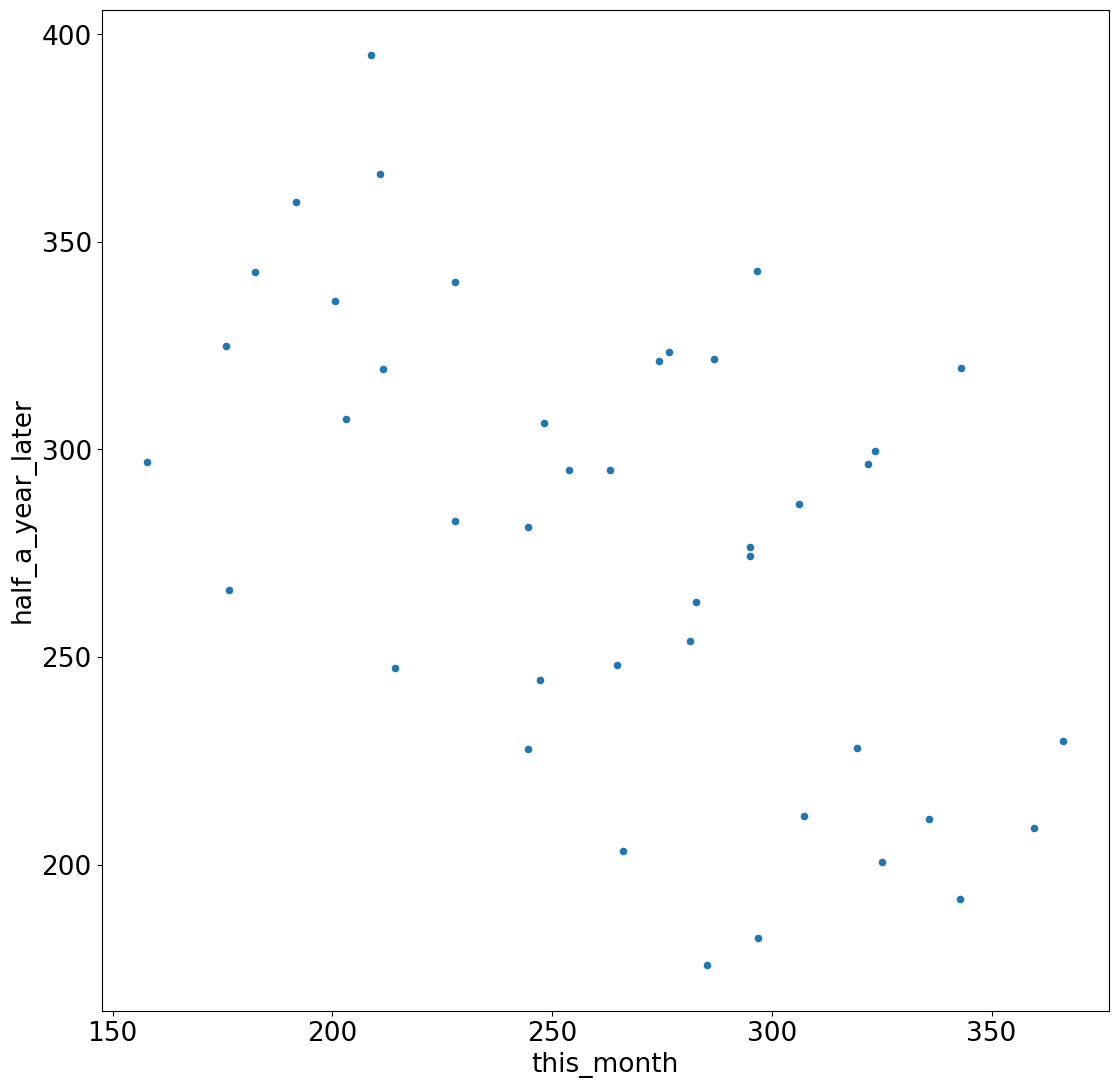

In [447]:
monthly = train[['month','day_of_week','sales_total']].resample('M').mean()
monthly['half_a_year_later'] = monthly.sales_total.shift(-6)
monthly = monthly.rename(columns={'sales_total': 'this_month'})
monthly.plot.scatter(x='this_month', y='half_a_year_later', figsize=(13, 13))
monthly

### Autocorrelation

In [454]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('D').mean())

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

In [395]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

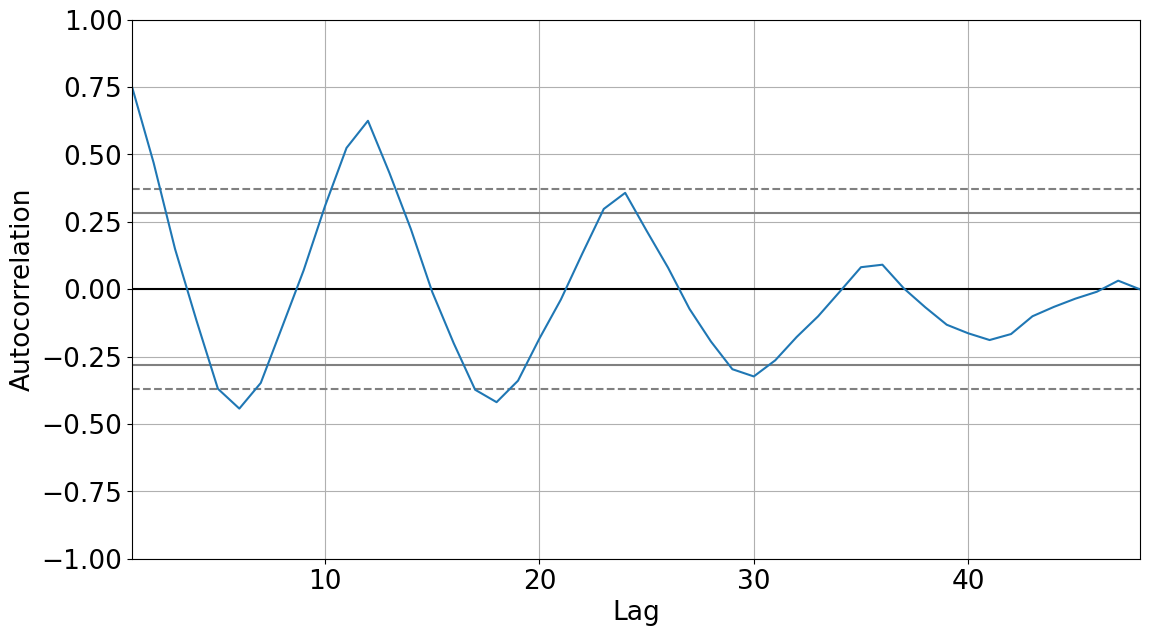

In [396]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('M').mean())

In [464]:
sm.tsa.seasonal_decompose(y.resample('W').mean()).plot()
plt.show()

## OPSD

In [397]:
# Acquire
df = get_german_power()

# prep
df = prep_german_power(df)

In [398]:
df.tail()

consumption     wind   solar  month  year  wind_and_solar
date                                                                 
2017-12-27   1263.94091  394.507  16.530     12  2017         411.037
2017-12-28   1299.86398  506.424  14.162     12  2017         520.586
2017-12-29   1295.08753  584.277  29.854     12  2017         614.131
2017-12-30   1215.44897  721.247   7.467     12  2017         728.714
2017-12-31   1107.11488  721.176  19.980     12  2017         741.156

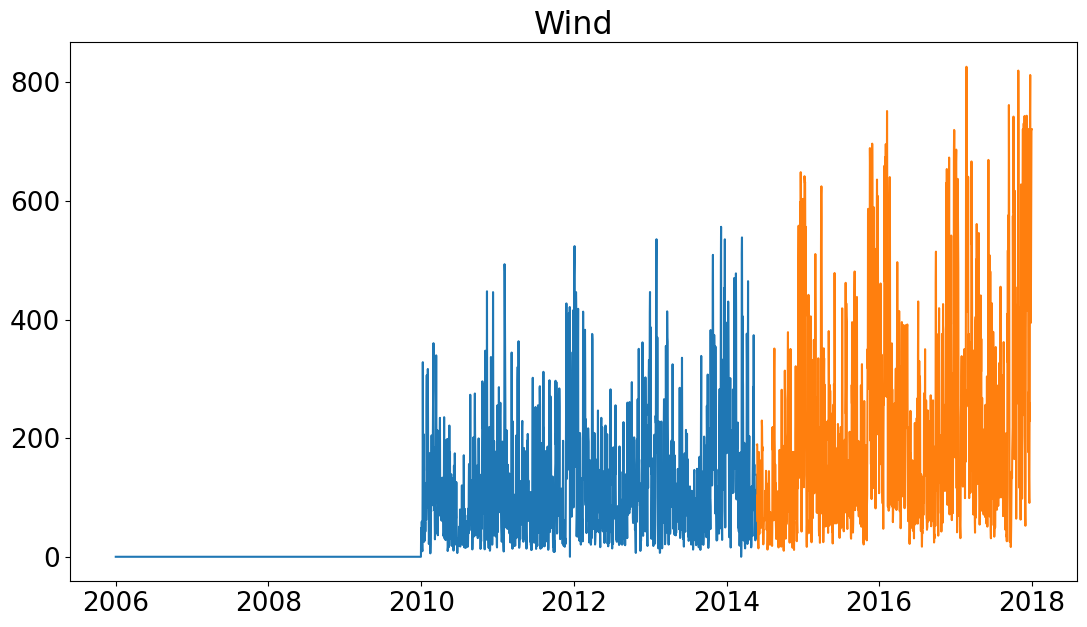

In [399]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.wind)
plt.plot(test.index, test.wind)
plt.title('Wind')
plt.show()

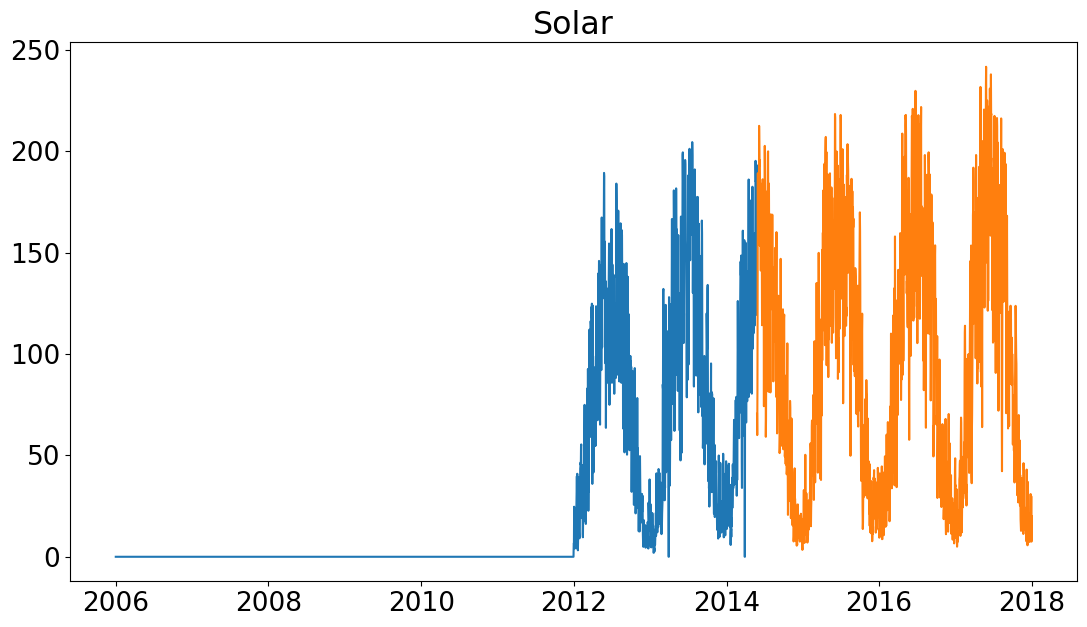

In [400]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.solar)
plt.plot(test.index, test.solar)
plt.title('Solar')
plt.show()


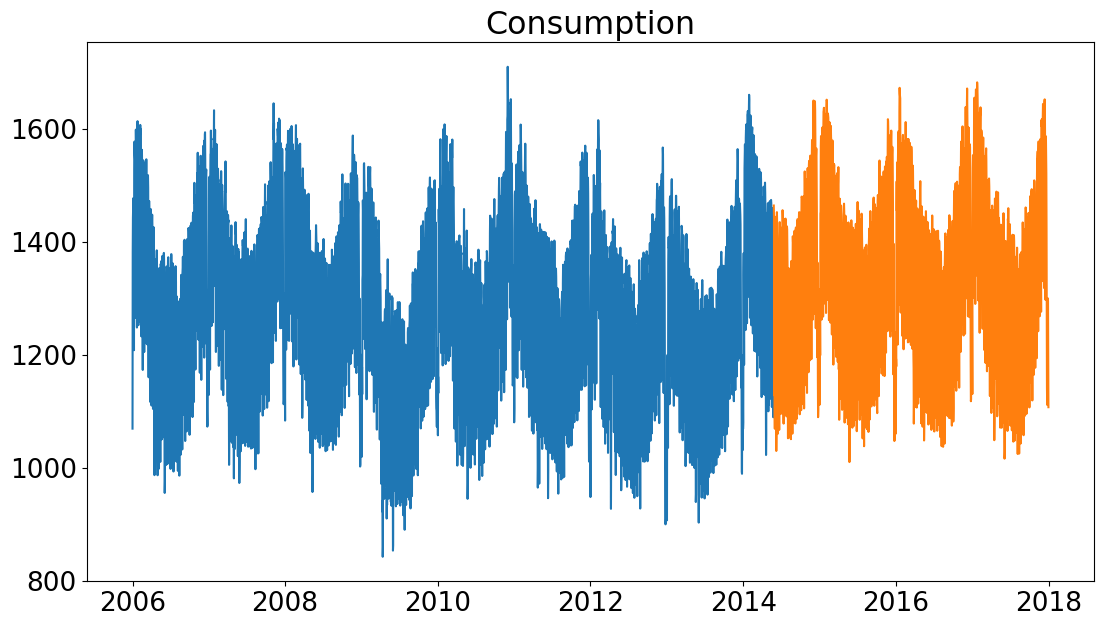

In [401]:
plt.plot(train.index, train.consumption)
plt.plot(test.index, test.consumption)
plt.title('Consumption')
plt.show()

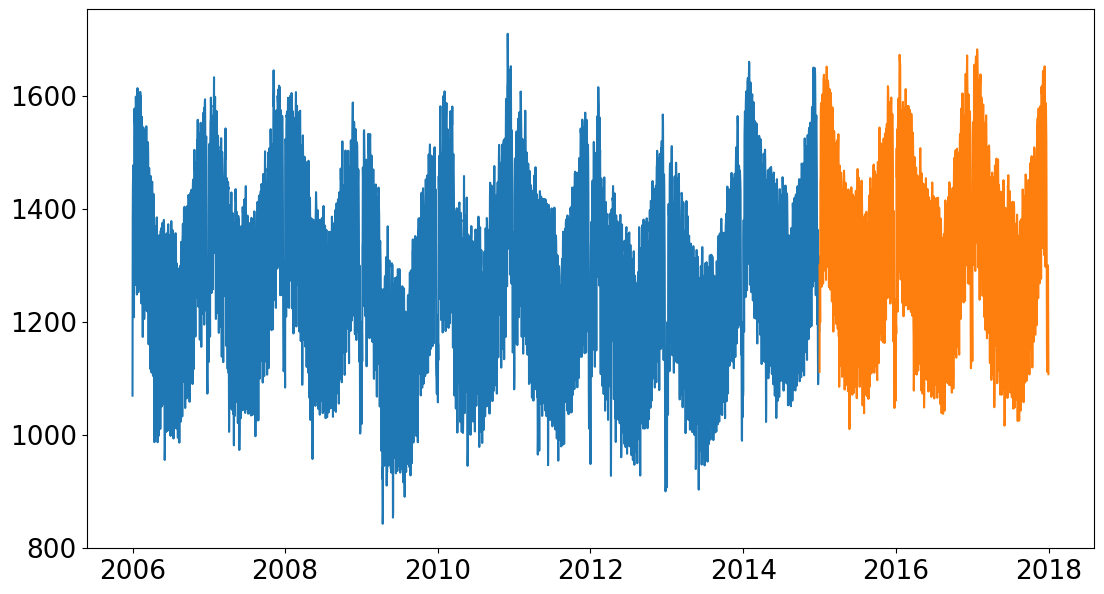

In [402]:
train = df.loc[:'2014'] # includes 2016
test = df.loc['2015':]

plt.plot(train.index, train.consumption)
plt.plot(test.index, test.consumption)


In [403]:
y_consumption = train.consumption

y_wind = train.loc['2010':]
y_wind = y_wind.wind

y_solar = train.loc['2012':]
y_solar = y_solar.solar

y_wind_and_solar = train.loc['2012':]
y_wind_and_solar = y_wind_and_solar.wind_and_solar

<Axes: ylabel='Frequency'>

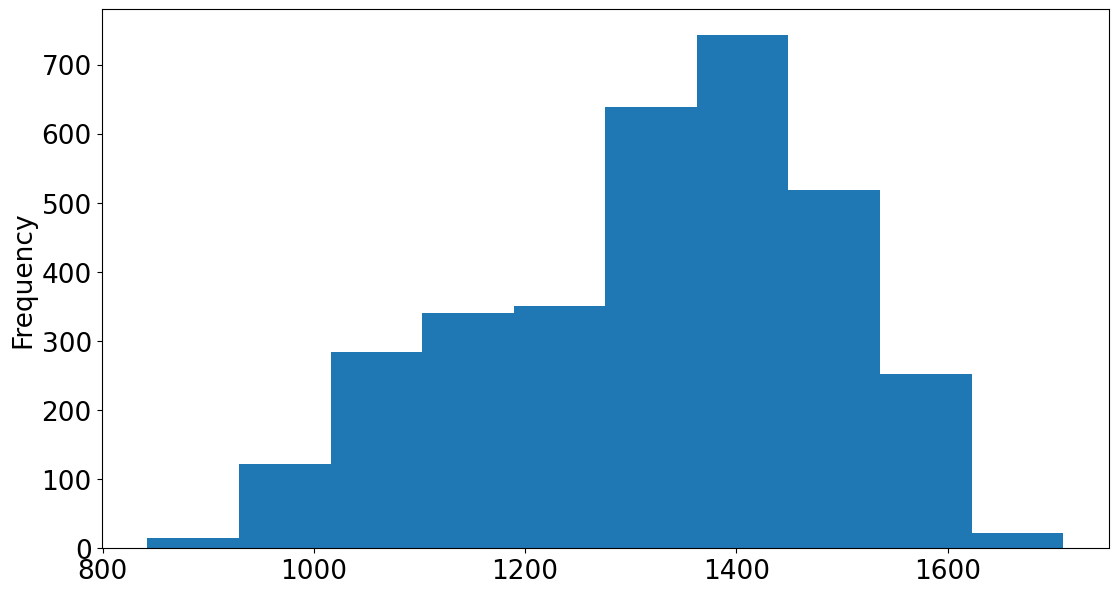

In [404]:
y_consumption.plot.hist()

In [405]:
y_wind.plot.hist()

<Axes: ylabel='Frequency'>

<Axes: ylabel='Frequency'>

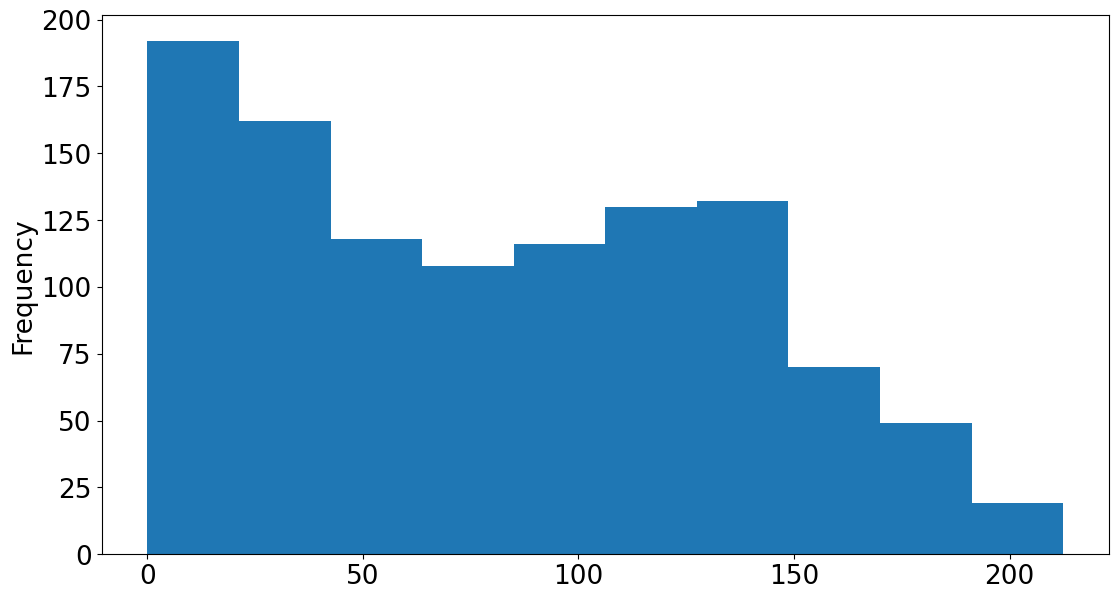

In [406]:
y_solar.plot.hist()

[Text(0.5, 1.0, 'Average Consumption by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Temp (F)')]

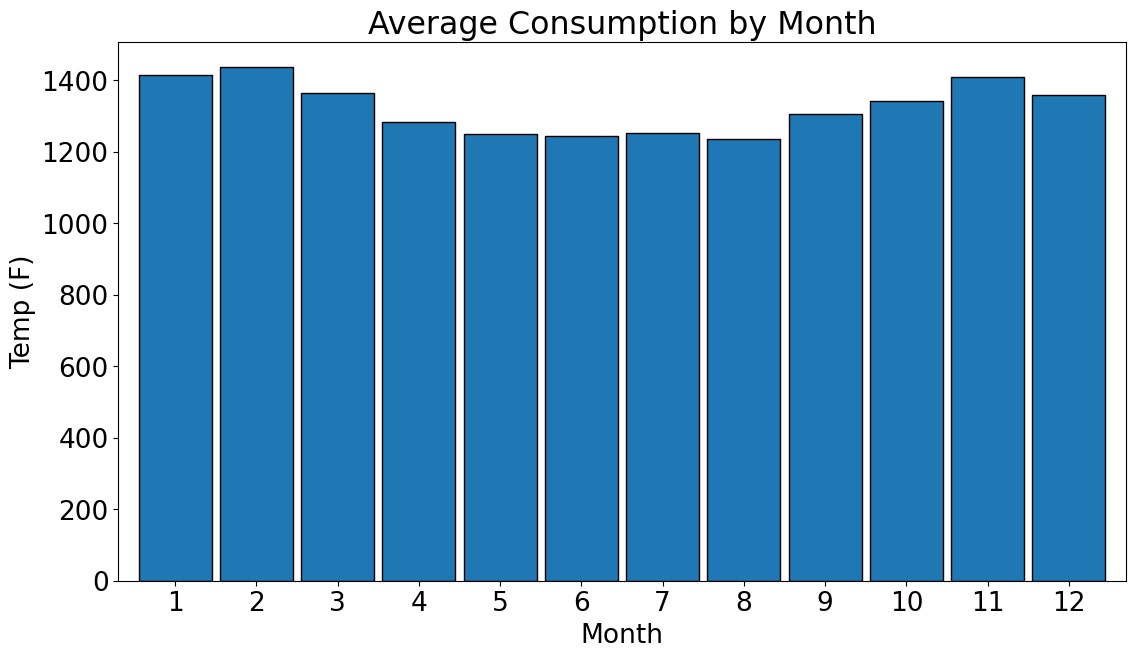

In [407]:
ax = y_consumption.groupby(y_consumption.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Consumption by Month', xlabel='Month', ylabel='Temp (F)')


[Text(0.5, 1.0, 'Average Solar by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Temp (F)')]

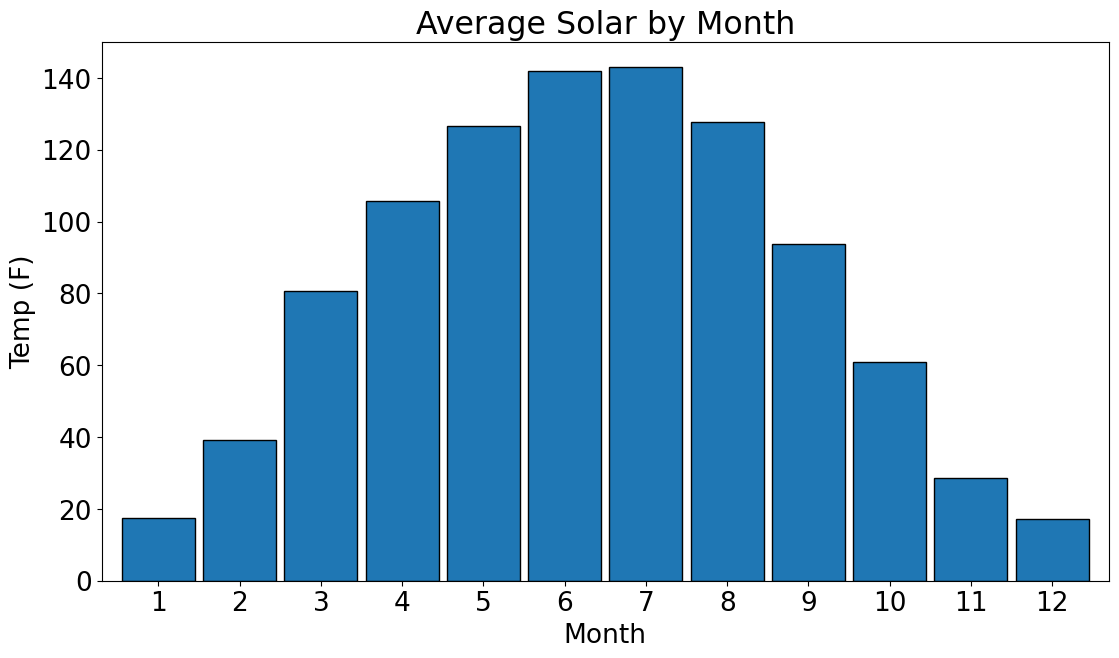

In [408]:
ax = y_solar.groupby(y_solar.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Solar by Month', xlabel='Month', ylabel='Temp (F)')

[Text(0.5, 1.0, 'Average Wind by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Temp (F)')]

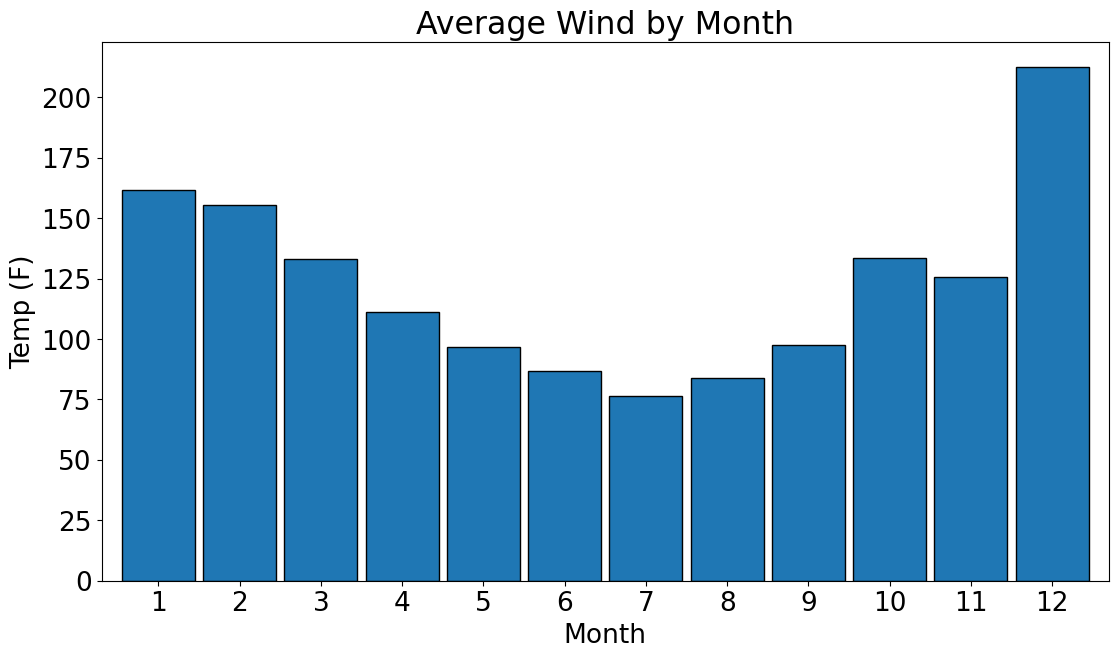

In [409]:
ax = y_wind.groupby(y_wind.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Wind by Month', xlabel='Month', ylabel='Temp (F)')

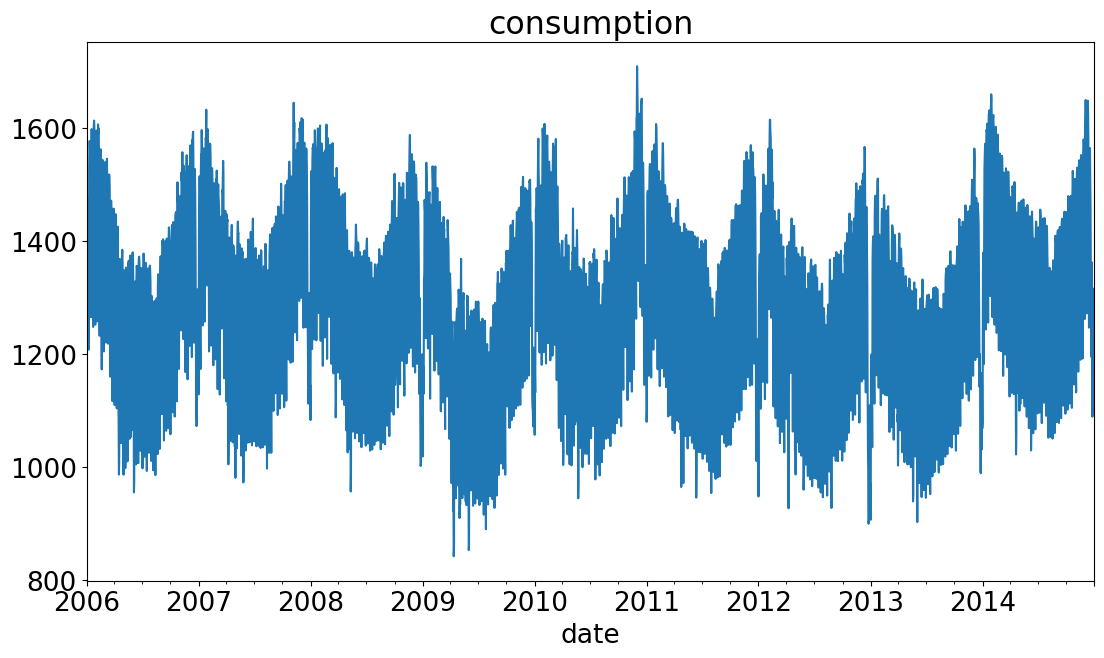

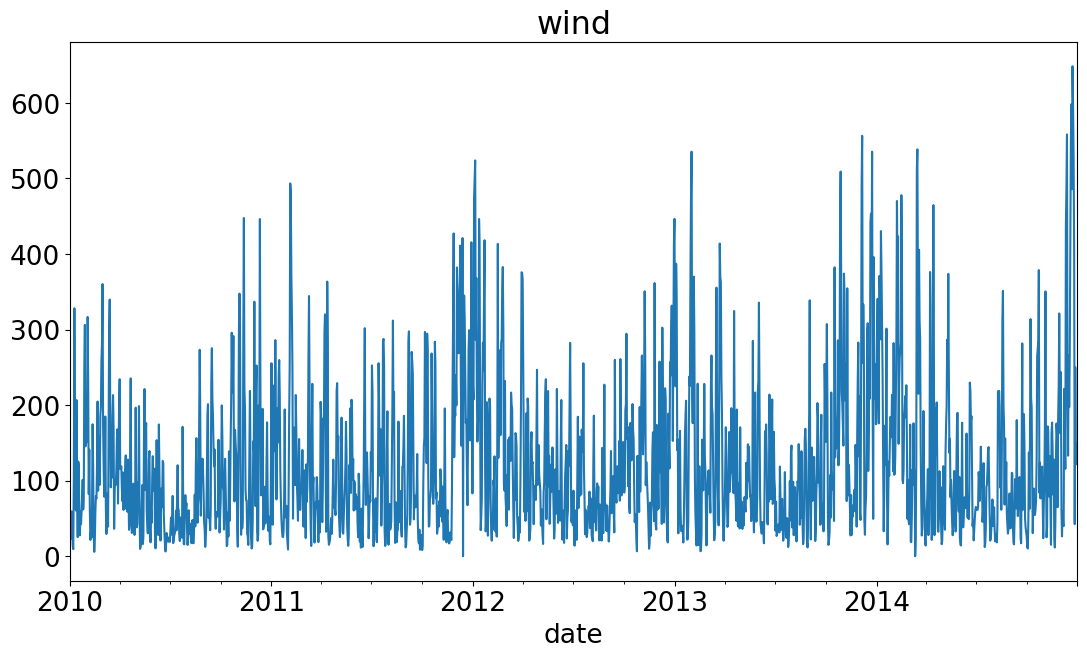

In [410]:
y_consumption.plot()
plt.title('consumption')
plt.show()
y_wind.plot()
plt.title('wind')
plt.show()
plt.title('solar')
y_solar.plot()
plt.show()


In [411]:
y_consumption.resample('M').mean().plot(title='Consumption 1 Month average')


<Axes: title={'center': 'Consumption 1 Month average'}, xlabel='date'>

In [412]:
y_wind.resample('M').mean().plot(title='Wind 1 Month average')

<Axes: title={'center': 'Wind 1 Month average'}, xlabel='date'>

<Axes: title={'center': 'Solar 1 Month average'}, xlabel='date'>

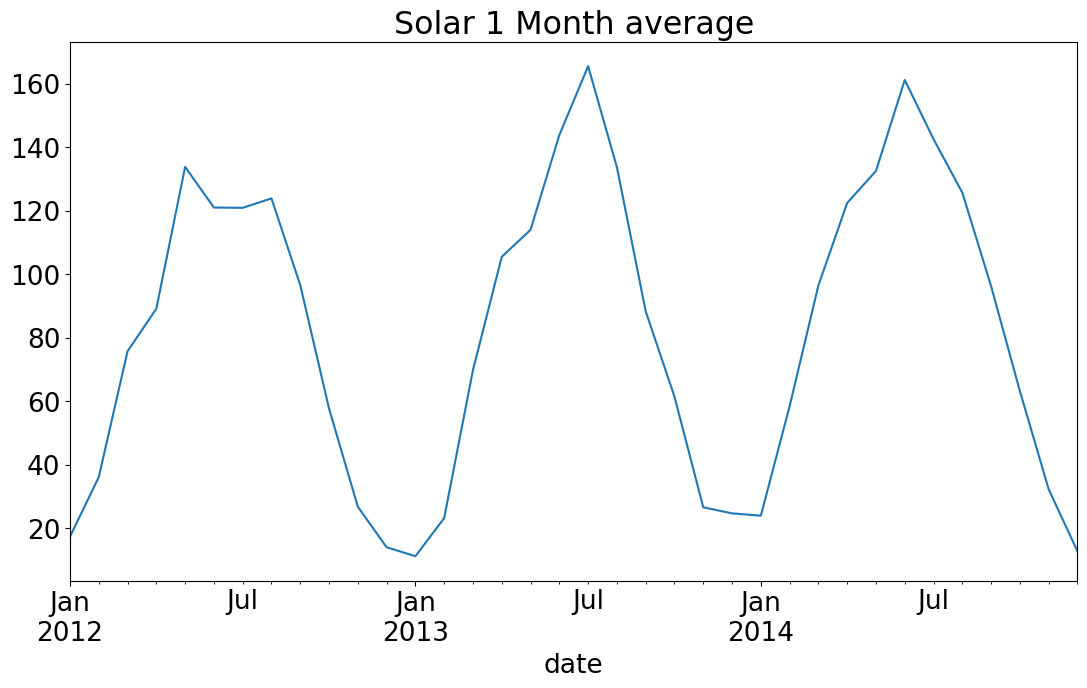

In [413]:
y_solar.resample('M').mean().plot(title='Solar 1 Month average')

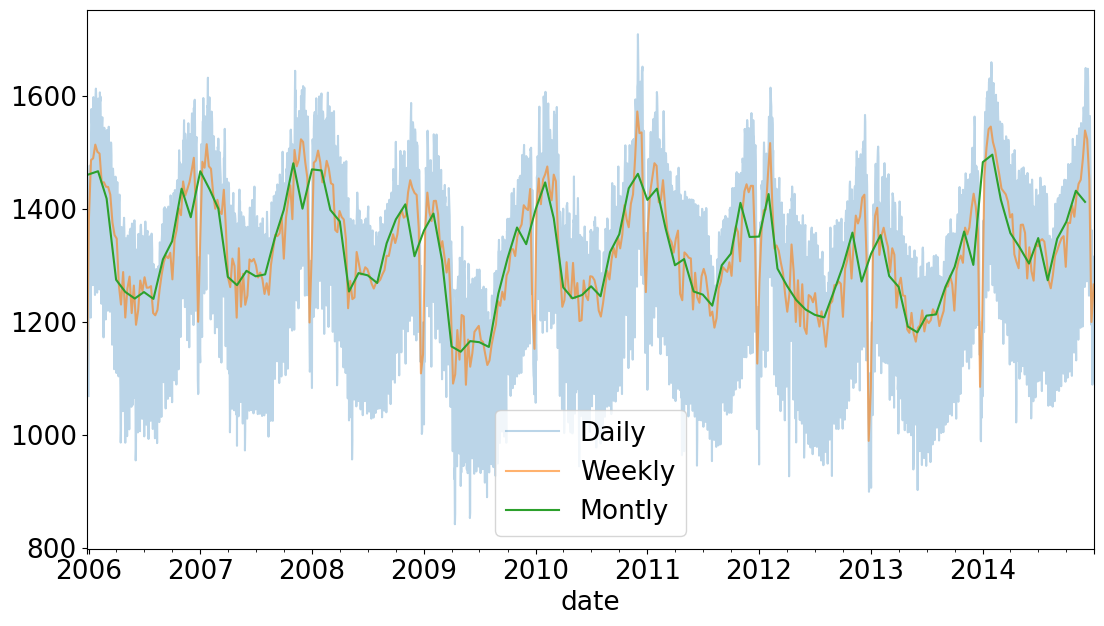

In [414]:
y_consumption.resample('D').mean().plot(alpha=.3, label='Daily')
y_consumption.resample('W').mean().plot(alpha=.6, label='Weekly')
y_consumption.resample('M').mean().plot(label='Montly')

plt.legend()


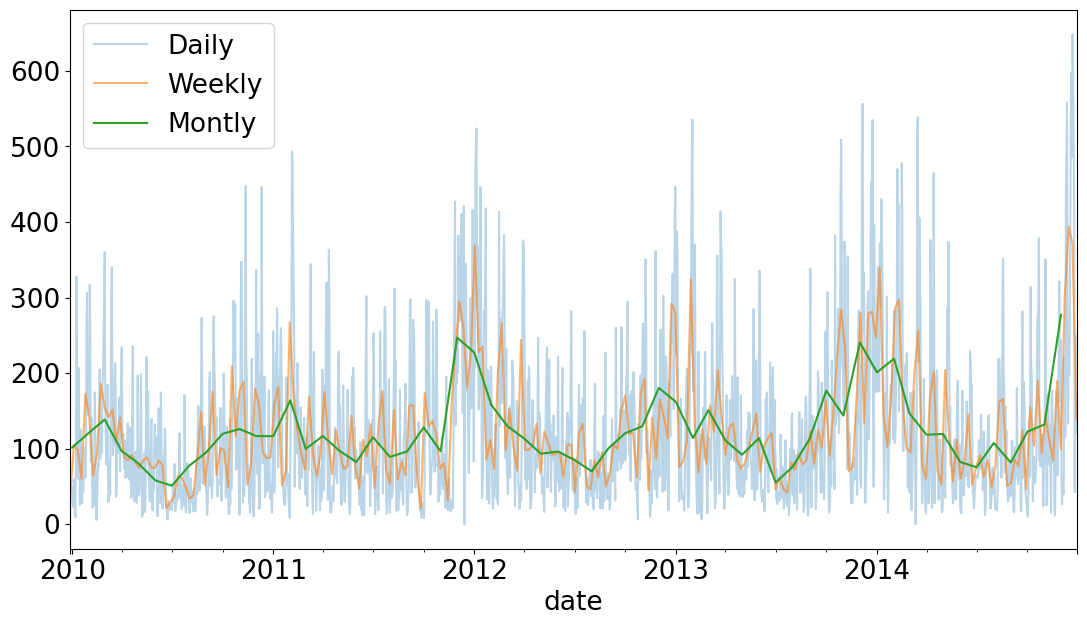

In [415]:
y_wind.resample('D').mean().plot(alpha=.3, label='Daily')
y_wind.resample('W').mean().plot(alpha=.6, label='Weekly')
y_wind.resample('M').mean().plot(label='Montly')

plt.legend()

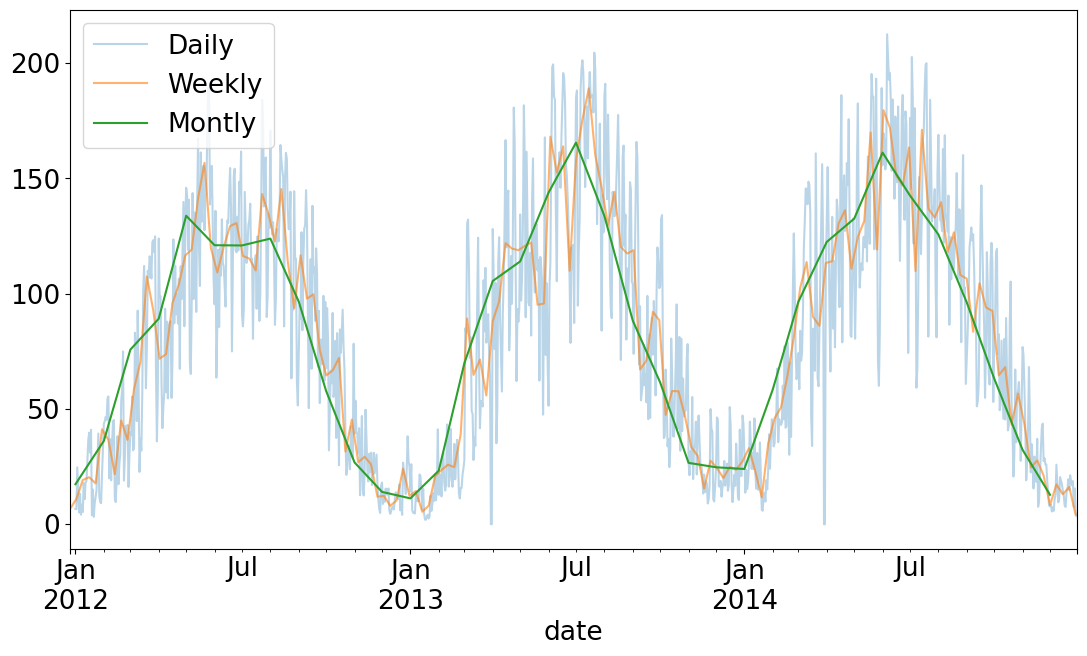

In [416]:
y_solar.resample('D').mean().plot(alpha=.3, label='Daily')
y_solar.resample('W').mean().plot(alpha=.6, label='Weekly')
y_solar.resample('M').mean().plot(label='Montly')

plt.legend()

<Axes: title={'center': 'Average week-to-week change in consumption'}, xlabel='date'>

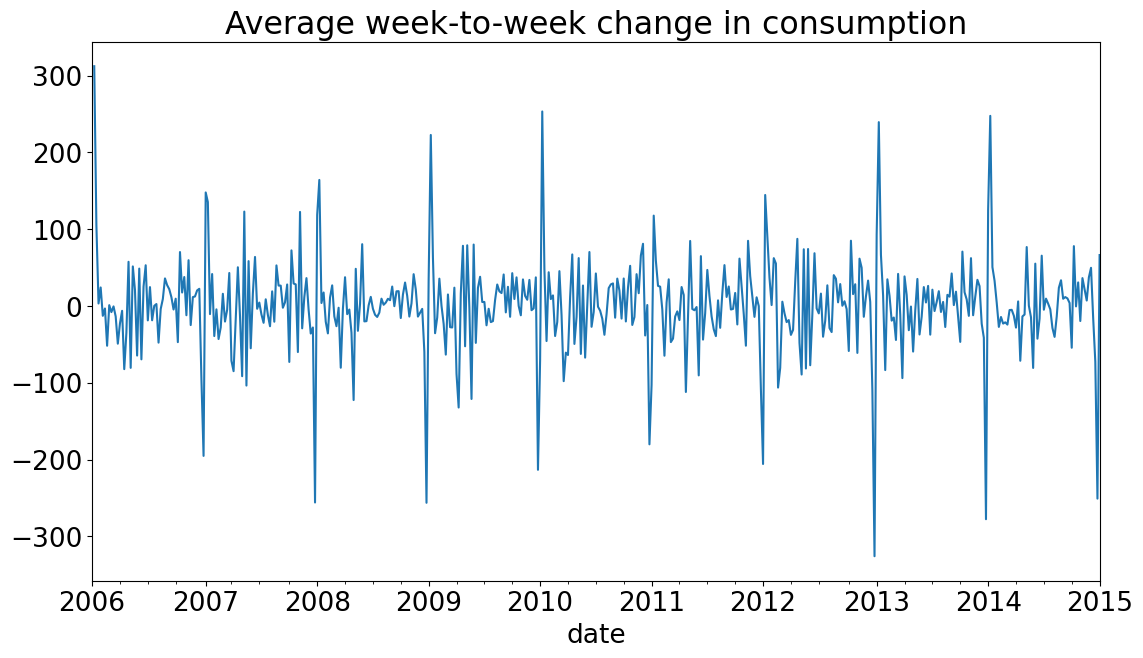

In [417]:
y_consumption.resample('W').mean().diff().plot(title='Average week-to-week change in consumption')


<Axes: title={'center': 'Average week-to-week change in consumption'}, xlabel='date'>

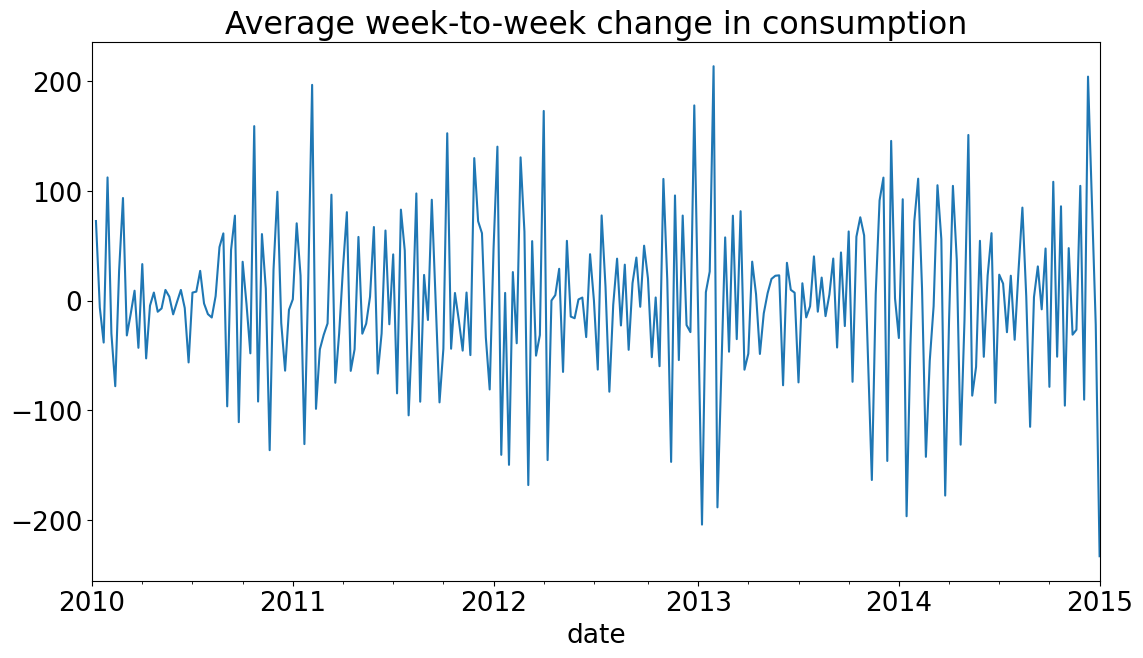

In [418]:
y_wind.resample('W').mean().diff().plot(title='Average week-to-week change in consumption')


<Axes: title={'center': 'Average week-to-week change in solar'}, xlabel='date'>

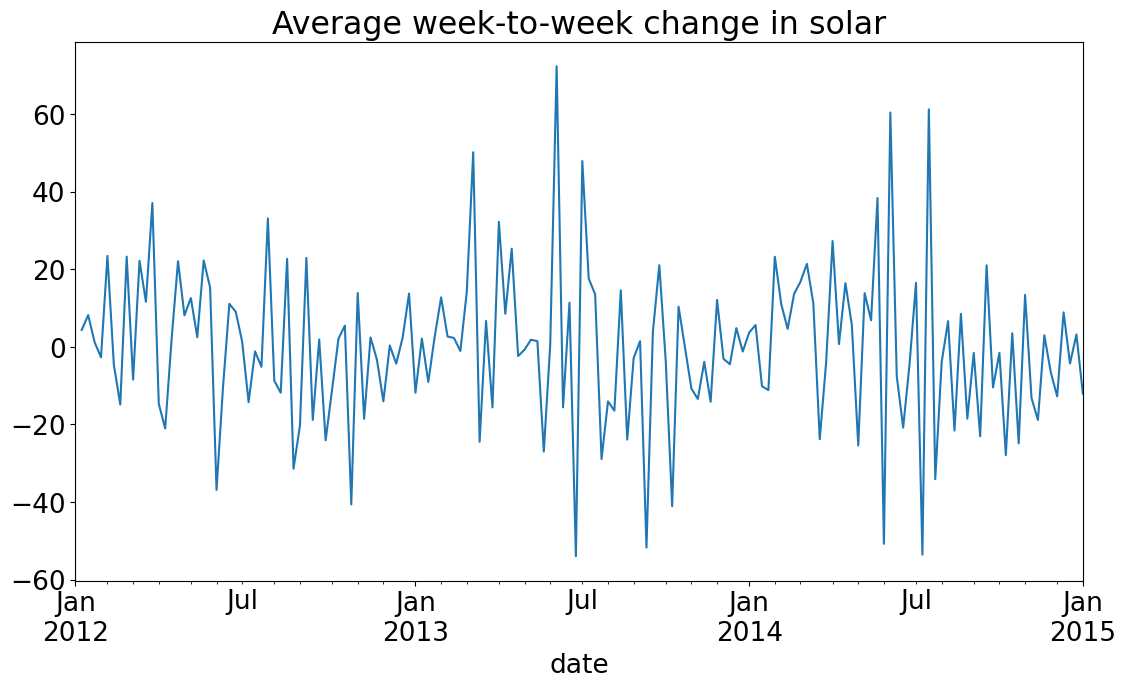

In [419]:
y_solar.resample('W').mean().diff().plot(title='Average week-to-week change in solar')


<Axes: title={'center': 'Seasonal Plot for consumption'}, xlabel='date'>

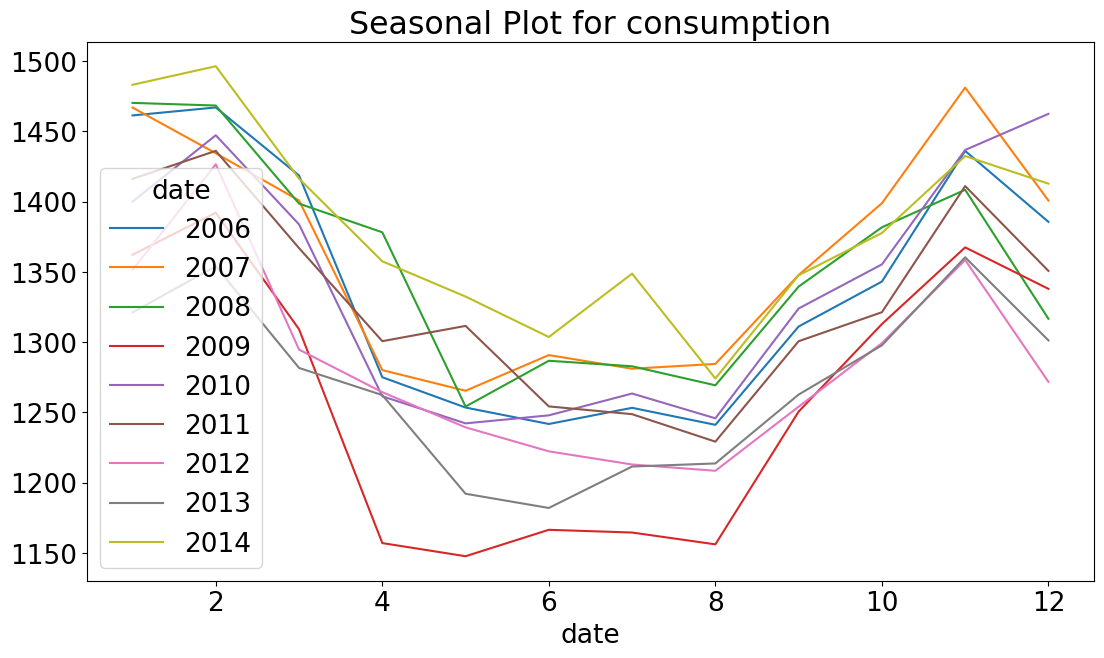

In [420]:
# .unstack turns an index level into columns
y_consumption.groupby([y_consumption.index.year, y_consumption.index.month]).mean().unstack(0).plot(title='Seasonal Plot for consumption')


<Axes: title={'center': 'Seasonal Plot for wind'}, xlabel='date'>

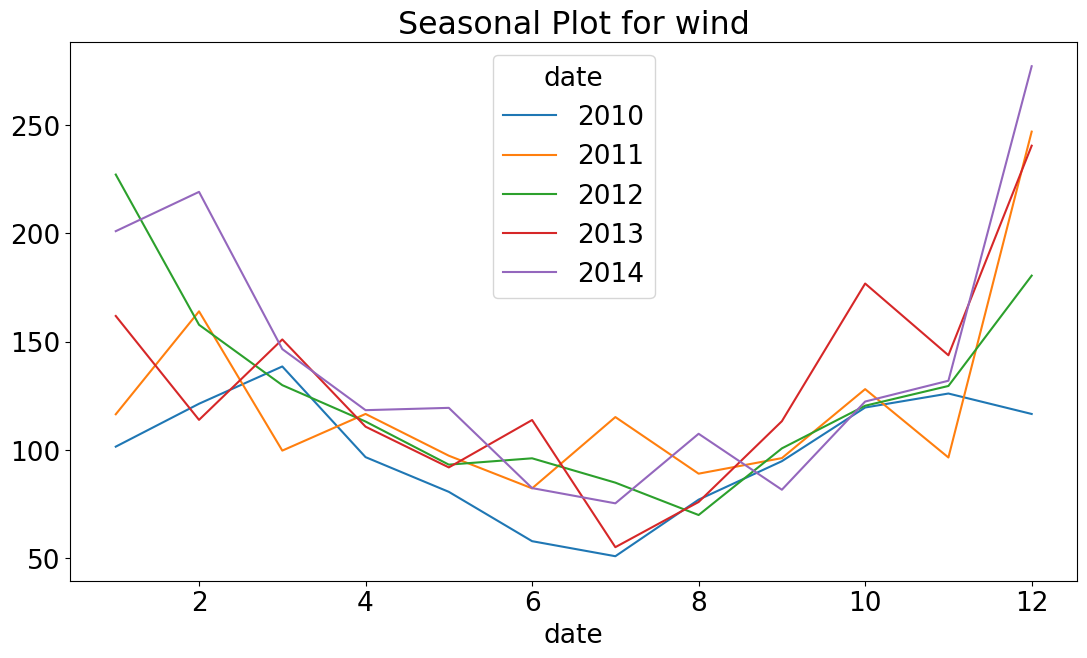

In [421]:
# .unstack turns an index level into columns
y_wind.groupby([y_wind.index.year, y_wind.index.month]).mean().unstack(0).plot(title='Seasonal Plot for wind')

<Axes: title={'center': 'Seasonal Plot for solar'}, xlabel='date'>

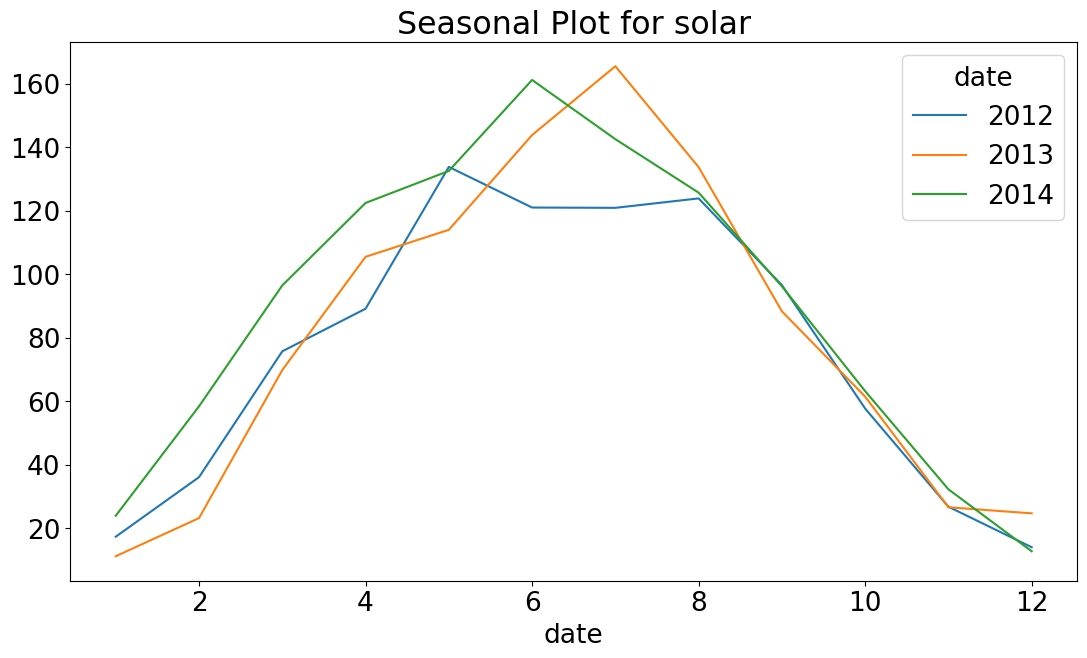

In [422]:
# .unstack turns an index level into columns
y_solar.groupby([y_solar.index.year, y_solar.index.month]).mean().unstack(0).plot(title='Seasonal Plot for solar')


this_week        wind      solar  month    year  wind_and_solar  \
date                                                                            
2006-01-01  1069.184000    0.000000   0.000000    1.0  2006.0        0.000000   
2006-01-08  1381.300143    0.000000   0.000000    1.0  2006.0        0.000000   
2006-01-15  1486.730286    0.000000   0.000000    1.0  2006.0        0.000000   
2006-01-22  1490.031143    0.000000   0.000000    1.0  2006.0        0.000000   
2006-01-29  1514.176857    0.000000   0.000000    1.0  2006.0        0.000000   
...                 ...         ...        ...    ...     ...             ...   
2014-12-07  1539.108571   99.019286   8.339429   12.0  2014.0      107.358714   
2014-12-14  1523.639286  303.341286  17.240571   12.0  2014.0      320.581857   
2014-12-21  1451.012286  393.652286  12.970000   12.0  2014.0      406.622286   
2014-12-28  1200.321429  371.776429  16.170000   12.0  2014.0      387.946429   
2015-01-04  1266.656667  138.750667   4.111333   12.0  2014.0      142.862000   

            the_next_week  
date                       
2006-01-01    1381.300143  
2006-01-08    1486.730286  
2006-01-15    1490.031143  
2006-01-22    1514.176857  
2006-01-29    1501.403286  
...                   ...  
2014-12-07    1523.639286  
2014-12-14    1451.012286  
2014-12-21    1200.321429  
2014-12-28    1266.656667  
2015-01-04            NaN  

[471 rows x 7 columns]

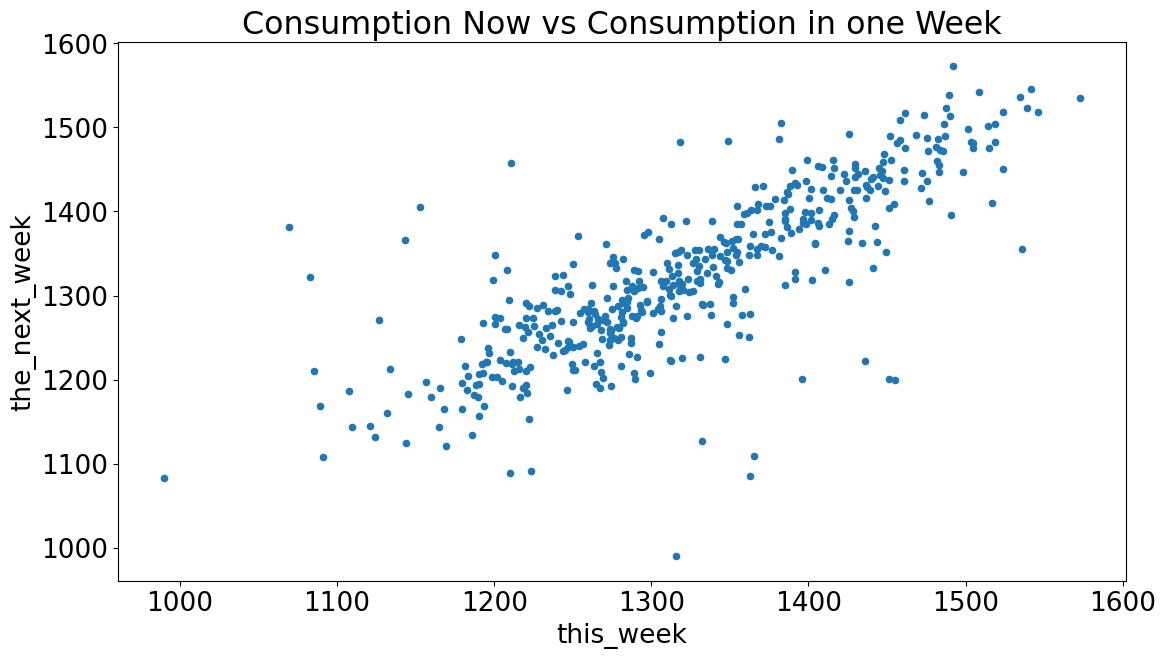

In [423]:
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.consumption.shift(-1)
weekly = weekly.rename(columns={'consumption': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
plt.title('Consumption Now vs Consumption in one Week')
weekly


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

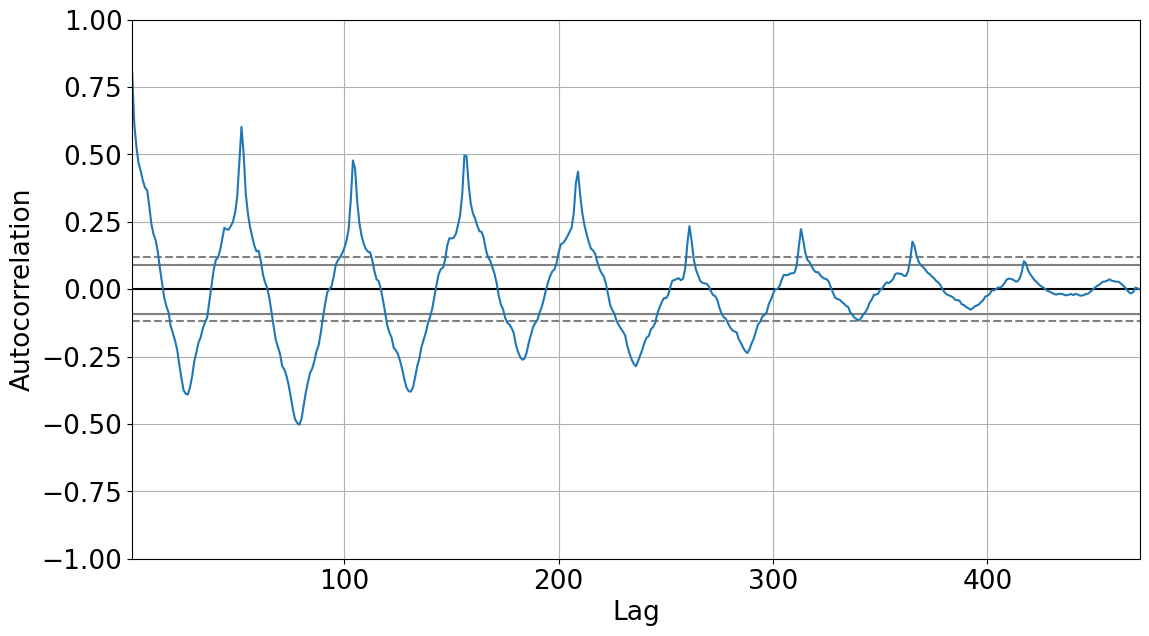

In [424]:
pd.plotting.autocorrelation_plot(y_consumption.resample('W').mean())


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

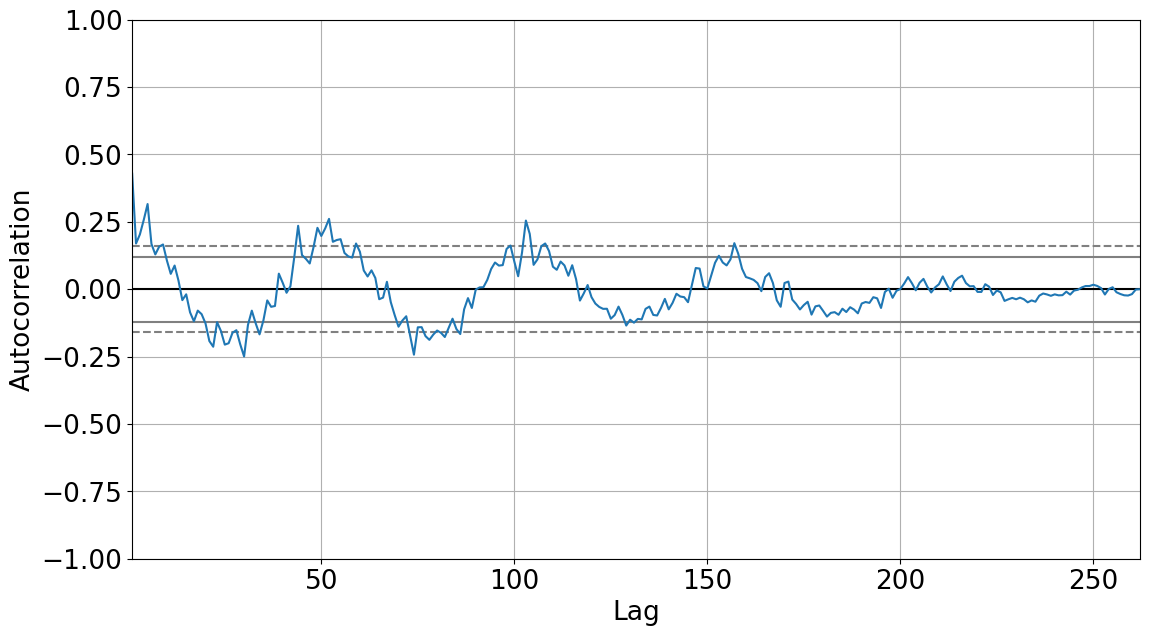

In [425]:
pd.plotting.autocorrelation_plot(y_wind.resample('W').mean())

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

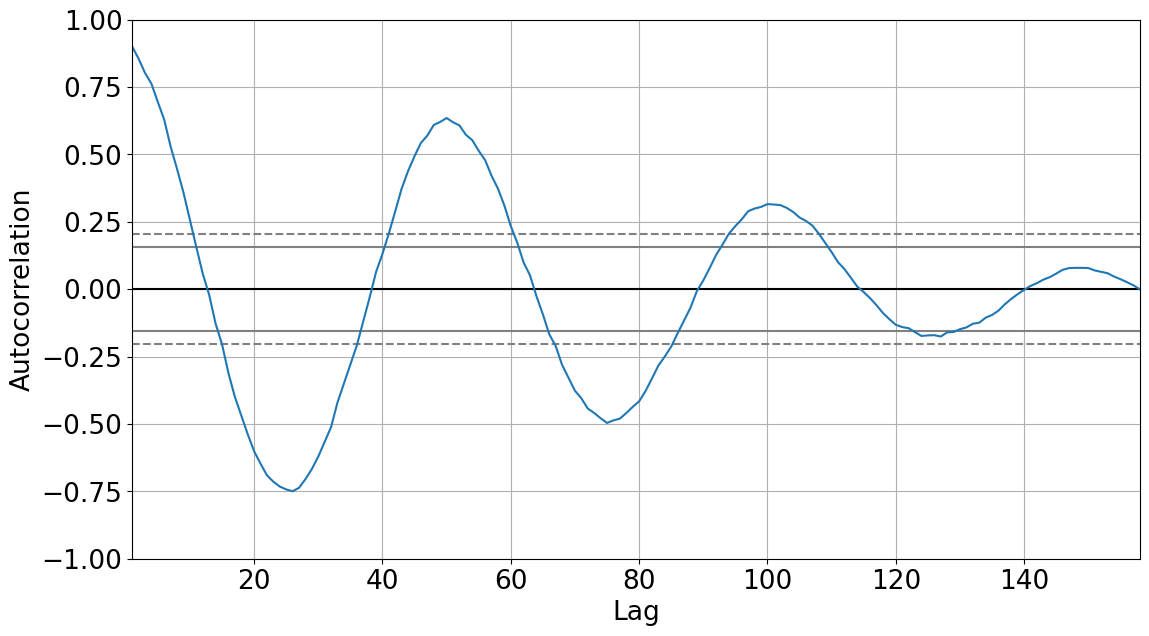

In [426]:
pd.plotting.autocorrelation_plot(y_solar.resample('W').mean())
